# Práctica 4 (Parte 2): Análisis en componentes principales (PCA)

+ __Estudiante 1:__
+ __Estudiante 2:__


# 0. Librerías.

In [22]:
#Librerías de interés.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

## 1. Datos de entrada

Vamos a utilizar un subconjunto muy pequeño del conjunto de datos MNIST que Kaggle aloja en su repositorio (https://www.kaggle.com/oddrationale/mnist-in-csv). Utilizaremos un archivo para entrenamiento y otro diferente para pruebas: "mnist_train_small.csv", y "mnist_test_small.csv", respectivamente. Cada una de las filas de estos conjuntos de datos tiene 785 columnas. La primera columna se denomina 'label' y corresponde a la categoría que es un número entre 0 y 9. Las 784 columnas restantes corresponden a los valores de los píxeles de una imagen cuadrada de 28x28 en escala de grises, donde cada píxel sólo puede tomar valores entre 0 y 255. 

In [4]:
# Vamos a leer el conjunto de datos en un dataframe de pandas.

df = pd.read_csv('../data/archive/mnist_train.csv')

## 2. Análisis Exploratorio

In [5]:
df.shape

(60000, 785)

El conjunto de datos tiene 60000 observaciones
Nombres de las columnas: 
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

Tipos de datos de cada columna: 
label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object



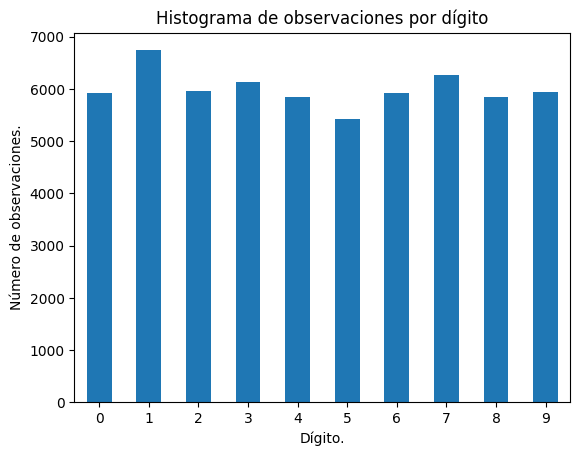

In [6]:
#¿Cuántas observaciones tenemos?
print('El conjunto de datos tiene {} observaciones'.format(df.shape[0]))  #Número de filas. 

#Revisemos los encabezados
print('Nombres de las columnas: \n', df.columns,'\n',sep='')

#Revisemos algunos atributos del conjunto de datos. 
print('Tipos de datos de cada columna: \n', df.dtypes,'\n',sep='')

#La salida es la columna 0 que corresponde a 'label'.
#Las columnas de la 1 hasta la última corresponden a los valores de píxeles en posiciones específicas (fila, columna) de una matriz cuadrada de 28 x 28 elementos. 
plt.figure
plt.hist(df['label'],bins=list(np.arange(-0.5,10.0,0.5)),align='left')
plt.xlim(-0.5,9.5)
plt.xticks(list(np.arange(0,10,1)));
plt.xlabel('Dígito.')
plt.ylabel('Número de observaciones.')
plt.title('Histograma de observaciones por dígito')
plt.show()



La salida deseada es 5.


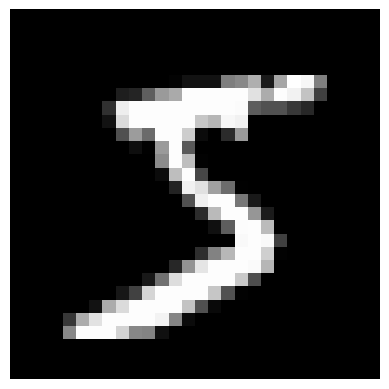


La salida deseada es 0.


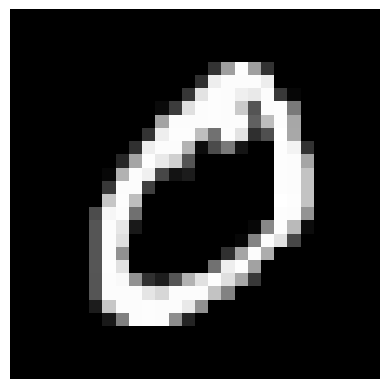


La salida deseada es 4.


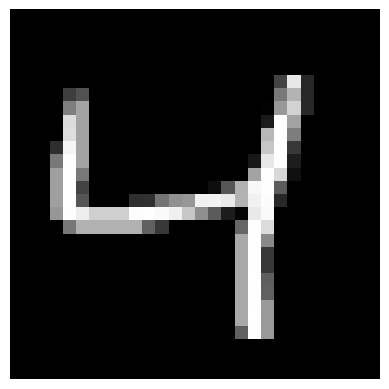

In [7]:
# Revisemos cómo se ven algunas de las observaciones cuando las graficamos como imágenes.
observaciones_a_visualizar = 3 #Número de observaciones a visualizar del conjunto de datos. 

for obs_number in range(observaciones_a_visualizar):
  output_of_single_observation = df.iloc[obs_number,0]   #Se extrae la salida correspondiente
  print('\nLa salida deseada es {}.'.format(output_of_single_observation))
  
  features_of_single_observation = df.iloc[obs_number,1:].values.reshape((28,28))   #Se extraen los atributos de entrada y se les cambia la forma, 
                                                                                    #de un vector fila a un arreglo cuadrado, note que np.sqrt(784)=28.
  plt.figure()
  plt.imshow(features_of_single_observation,cmap='gray') #Se grafica como una imagen en escala de grises. 
  plt.axis('off') #Esta instrucción quita los ejes x e y. 
  plt.show()

# 3. Modelo y 4. Evaluación

### Preparación de los Datos

### Ejercicio 1

Normalice los valores de todas las imágenes entre 0 y 1. Esto se puede lograr dividiendo toda la imagen entre 255.

In [10]:
# Normalizando los valores de píxeles entre 0 y 1
df.iloc[:, 1:] = df.iloc[:, 1:] / 255.0

### Ejercicio 2

Particione los datos en los conjuntos de entrenamiento y prueba.

In [11]:
from sklearn.model_selection import train_test_split

# División en características (X) y etiquetas (y)
X = df.iloc[:, 1:]  # Características (píxeles)
y = df['label']     # Etiquetas

# División en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos creados
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (48000, 784)
Forma de X_test: (12000, 784)
Forma de y_train: (48000,)
Forma de y_test: (12000,)


### Ejercicio 3

Construya tres modelos de clasificación:

- KNN
- Regresión Logística
- Random Forests

Ajuste los hiperparámetros para cada uno de ellos. Puede usar Repeated Stratified Cross-Validation para evaluar la calidad de cada modelo. Consigne sus observaciones.

Entrene y evalúe el desempeño del modelo por clase (en los conjuntos de entrenamiento y prueba) usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo (en los conjuntos de entrenamiento y prueba) usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles números se clasifican mejor, etc.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Define the model as the K-Nearest Neighbors classifier and fit the model to the data.
knn = KNeighborsClassifier()

steps = [("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space. Here, we are tuning the number of neighbors in the range 1 to 24.
parameters = {
    "knn__n_neighbors": np.arange(1, 25),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_knn = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_knn.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_knn = best_model_knn.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_knn.score(X_test, y_test)))
print(classification_report(y_test, y_pred_knn))
print("Tuned Model Parameters: {}".format(best_model_knn.best_params_))

In [15]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline including StandardScaler and LogisticRegression
steps = [("log_reg", LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space.
parameters = {
    "log_reg__C": [0.01],
    "log_reg__penalty": ['l1', 'l2']
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_lr = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_lr.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_lr = best_model_lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/l

In [20]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_lr.score(X_test, y_test)))
print(classification_report(y_test, y_pred_lr))
print("Tuned Model Parameters: {}".format(best_model_lr.best_params_))

Accuracy: 0.11016666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1175
           1       0.11      1.00      0.20      1322
           2       0.00      0.00      0.00      1174
           3       0.00      0.00      0.00      1219
           4       0.00      0.00      0.00      1176
           5       0.00      0.00      0.00      1104
           6       0.00      0.00      0.00      1177
           7       0.00      0.00      0.00      1299
           8       0.00      0.00      0.00      1160
           9       0.00      0.00      0.00      1194

    accuracy                           0.11     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.11      0.02     12000

Tuned Model Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Define the model as a Decision Tree classifier and fit the model to the data.
random_forest = RandomForestClassifier()

steps = [("random_forest", RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space for the Decision Tree classifier.
parameters = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 5, 10, 15],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}  # Example hyperparameters to tune

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_rf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_rf = best_model_rf.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_rf.score(X_test, y_test)))
print(classification_report(y_test, y_pred_rf))
print("Tuned Model Parameters: {}".format(best_model_rf.best_params_))

### Ejercicio 4

Haga el Análisis de Componentes Principales (PCA) para el conjunto de datos MNIST y escoja el conjunto de componentes que considere más adecuado.

Text(0, 0.5, 'cumulative explained variance')

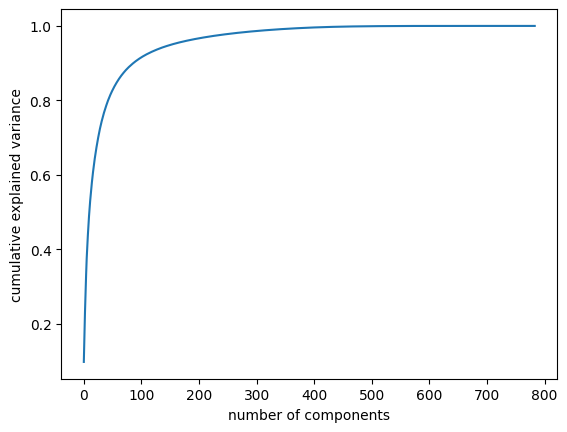

In [23]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [24]:
pca = PCA(n_components=300) # change the n_components to your desired number
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Ejercicio 5

Usando el conjunto de datos transformados mediante PCA repita el ejercicio Ejercicio 3.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Define the model as the K-Nearest Neighbors classifier and fit the model to the data.
knn = KNeighborsClassifier()

steps = [("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space. Here, we are tuning the number of neighbors in the range 1 to 24.
parameters = {
    "knn__n_neighbors": np.arange(1, 25),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_knn_pca = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_knn_pca.fit(X_train_pca, y_train)

# Predict the labels of the test set: y_pred
y_pred_knn_pca = best_model_knn_pca.predict(X_test_pca)

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_knn_pca.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_knn))
print("Tuned Model Parameters: {}".format(best_model_knn_pca.best_params_))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline including StandardScaler and LogisticRegression
steps = [("log_reg", LogisticRegression(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space.
parameters = {
    "log_reg__C": [0.01],
    "log_reg__penalty": ['l1', 'l2']
}

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_lr_pca = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_lr_pca.fit(X_train_pca, y_train)

# Predict the labels of the test set: y_pred
y_pred_lr_pca = best_model_lr_pca.predict(X_test_pca)

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_lr_pca.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_lr))
print("Tuned Model Parameters: {}".format(best_model_lr_pca.best_params_))

In [ ]:
# Define the model as a Decision Tree classifier and fit the model to the data.
random_forest = RandomForestClassifier()

steps = [("random_forest", RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Define the hyperparameter configuration space for the Decision Tree classifier.
parameters = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 5, 10, 15],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}  # Example hyperparameters to tune

# Create the GridSearchCV object. We will use 5-fold cross-validation.
best_model_rf_pca = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model to the training set.
best_model_rf_pca.fit(X_train_pca, y_train)

# Predict the labels of the test set: y_pred
y_pred_rf_pca = best_model_rf_pca.predict(X_test_pca)

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(best_model_rf_pca.score(X_test_pca, y_test)))
print(classification_report(y_test, y_pred_rf_pca))
print("Tuned Model Parameters: {}".format(best_model_rf_pca.best_params_))

### Ejercicio 6

Compare los resultados obtenidos usando el conjunto de datos transformados mediante PCA y los obtenidos con el conjunto de datos original. Compare también los tiempos de ejecución.